<a href="https://colab.research.google.com/github/ajaycode/machine-learning/blob/main/Forecast_with_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   index   1258 non-null   int64         
 1   ds      1258 non-null   datetime64[ns]
 2   y       1258 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 29.6 KB
None
             index            y
count  1258.000000  1258.000000
mean    628.500000   184.040270
std     363.297628    78.094841
min       0.000000    72.926231
25%     314.250000   106.860046
50%     628.500000   175.661957
75%     942.750000   253.185093
max    1257.000000   340.882782


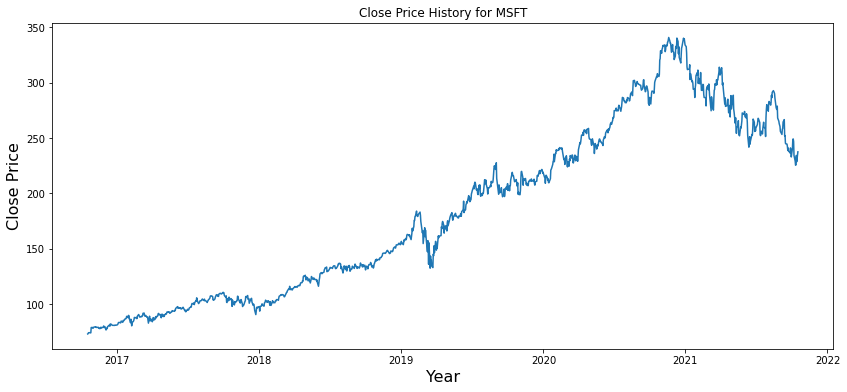

DEBUG:cmdstanpy:input tempfile: /tmp/tmpmh_5rmo8/15rbp0j5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpmh_5rmo8/5zae0r8_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34734', 'data', 'file=/tmp/tmpmh_5rmo8/15rbp0j5.json', 'init=/tmp/tmpmh_5rmo8/5zae0r8_.json', 'output', 'file=/tmp/tmpmh_5rmo8/prophet_modeltjs11o24/prophet_model-20221017223704.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
22:37:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
22:37:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
1618,2023-10-13,169.018234,112.723434,231.936616
1619,2023-10-14,168.714343,113.747463,230.641355
1620,2023-10-15,168.851379,112.119429,233.517440
1621,2023-10-16,169.279204,111.668658,233.114682
1622,2023-10-17,169.349913,111.860830,230.539008


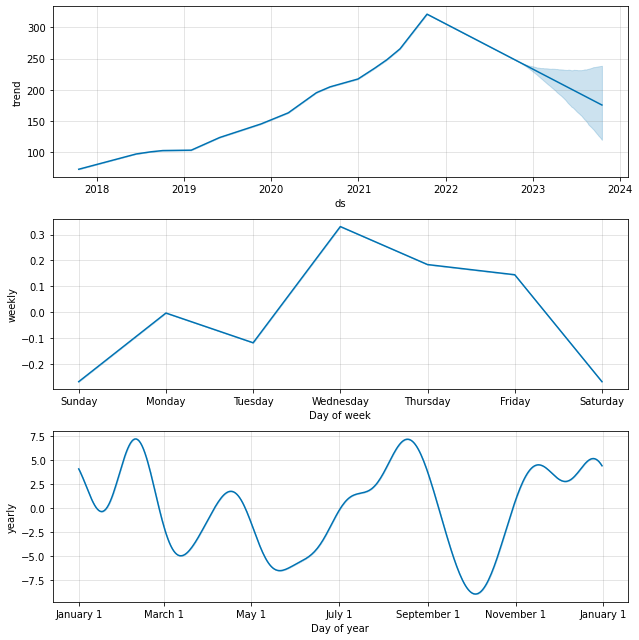

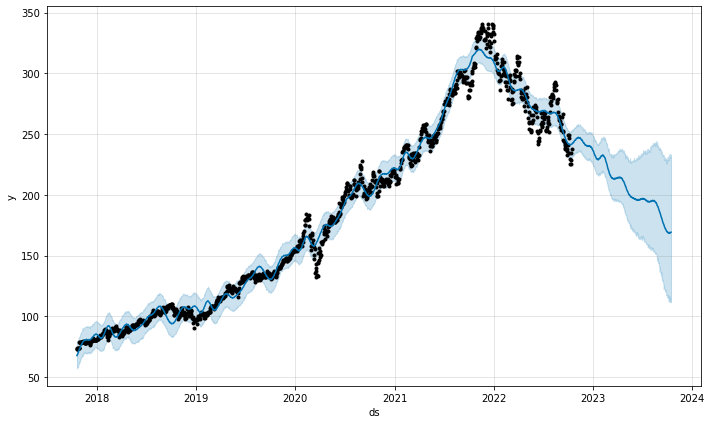

In [ ]:
#https://ecyy.medium.com/forecasting-by-fb-prophet-in-colab-c9d4db2d4195
#install FB Prophet and yfinance
#!pip install prophet
#!pip install yfinance

#import pd, plt and Prophet
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import datetime as datetime
from prophet import Prophet

#read time series data from Yahoo Finance by yfinance
HSI = yf.Ticker("MSFT") 
#start = datetime.datetime(2022,1,1)
#end = datetime.datetime(2022,9,5)
#hist = HSI.history(start=start, end=end, auto_adjust=True)
hist=HSI.history(period="5y")
#print ("Printing stock history")
#print (hist)
#if import data via url: 
#url="https://query1.finance.yahoo.com/v7/finance/download/MSFT?period1=1640995200&period2=1665964800&interval=1d&events=history&includeAdjustedClose=true"  
#df=pd.read_csv(url)   
#print(df.head())

#show the data table in Date, Stock Price (Close)
df = pd.DataFrame()
df['ds'] = hist.index 
#df['Date'].dt.tz_convert(None)
df['y'] = hist['Close'].values

df['ds']=pd.to_datetime(df.ds).dt.tz_localize(None)

#df = df.rename(columns={"Date":"ds", "Close":"y"})
#print ("Print tail")
#print (df.tail(10))
#show the information and descriptions of the data collected
print(df.reset_index().info())
print(df.reset_index().describe())

#plot the chart
plt.figure(figsize=(14,6))
plt.title('Close Price History for MSFT')
#df['Close'].plot(title="MSFT stock price")
#plt.plot(df['y'])
plt.plot(hist.index, hist.Close, label="MSFT")
plt.xlabel('Year', fontsize=16)
plt.ylabel('Close Price' , fontsize=16)
plt.show()

#define data x,y
#data = df.reset_index()[['Date', 'Close']]
#data.columns = ['ds' , 'y']

#define the forecasting model parameters, trend = logistic growth, yearly seasonality = multiplicative, no holiday parameter
#model_params = {"daily_seasonality": False, "weekly_seasonality": False, "yearly_seasonality": True, "seasonality_mode": "multiplicative", "growth": "logistic"}
#model_params = {growth='logistic'}
#define the forecasting model and set the cap
#model = Prophet (daily_seasonality = True, freq='D')
model = Prophet (daily_seasonality = False)
#model = Prophet(model_params)
#model = Prophet()

#define future as the future 365 days' data, and define forecast as predicting the future by the forecasting model
model.fit(df)
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

#plot the model forecast chart with component charts in trend and seasonality 
model.plot_components(forecast)
model.plot(forecast)

#show all the forecasting values in a table
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()